<a href="https://colab.research.google.com/github/juanescendales/IAIdentifiacionDeColoresFlores/blob/master/MicroProyecto2_ClusteringCultivoFlores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificación de color en imágenes de cultivos de flores


Se quiere determinar por medio de clustering los tipos de cultivos flores visibles e
indicar el porcentaje cultivado, realizando la mayor caracterización de los datos posible. Esto con un data-set de dos imagenes



Priemero vamos a importar los archivos necesesarios para el programa

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Cultivos_de_Flores_1.jpg to Cultivos_de_Flores_1.jpg
Saving Cultivos_de_Flores_1_Procesada.jpg to Cultivos_de_Flores_1_Procesada.jpg
Saving Cultivos_de_Flores_2.jpeg to Cultivos_de_Flores_2.jpeg
Saving Cultivos_de_Flores_2_Procesada.jpg to Cultivos_de_Flores_2_Procesada.jpg


# Preprocesamiento de los datos

In [0]:
import pandas as pd
import numpy as np
import cv2
import seaborn as sb
import matplotlib.pyplot as plt
from skimage import data, filters, util, io
from skimage.morphology import disk

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

## Captura de las imagenes

Estas son nuestras imagenes seleccionadas

In [3]:
imagen1Matriz = cv2.imread('Cultivos_de_Flores_1.jpg') #Convierte la imagen en una array de arrays que cada uno representa un pixel en codigo BGR
imagen1Matriz = cv2.cvtColor(imagen1Matriz,cv2.COLOR_BGR2RGB) #Convierte los codfigo BGR en codigos RGB
imagen1Matriz

array([[[209, 229, 254],
        [212, 232, 255],
        [217, 233, 255],
        ...,
        [238, 249, 255],
        [238, 249, 255],
        [238, 249, 255]],

       [[210, 228, 252],
        [214, 232, 255],
        [218, 234, 255],
        ...,
        [238, 249, 255],
        [238, 249, 255],
        [238, 249, 255]],

       [[211, 228, 248],
        [215, 232, 252],
        [221, 236, 255],
        ...,
        [238, 249, 255],
        [238, 248, 255],
        [238, 248, 255]],

       ...,

       [[155, 140, 207],
        [ 79,  63, 136],
        [138, 119, 208],
        ...,
        [ 27,  26,  34],
        [ 45,  34,  40],
        [ 44,  29,  32]],

       [[135, 117, 193],
        [102,  82, 167],
        [124, 102, 202],
        ...,
        [ 22,  21,  29],
        [ 43,  36,  44],
        [ 39,  29,  37]],

       [[120,  98, 183],
        [ 93,  70, 160],
        [ 87,  62, 163],
        ...,
        [ 33,  26,  33],
        [ 50,  40,  48],
        [ 40,  31,  36]]

In [4]:
imagen2Matriz = cv2.imread('Cultivos_de_Flores_2.jpeg') #Convierte la imagen en una array de arrays que cada uno representa un pixel en codigo BGR
imagen2Matriz = cv2.cvtColor(imagen2Matriz,cv2.COLOR_BGR2RGB) #Convierte los codfigo BGR en codigos RGB
imagen2Matriz

array([[[118, 148, 234],
        [118, 148, 234],
        [118, 148, 234],
        ...,
        [ 76, 112, 208],
        [ 76, 112, 208],
        [ 76, 112, 208]],

       [[119, 149, 235],
        [119, 149, 235],
        [119, 149, 235],
        ...,
        [ 77, 113, 209],
        [ 77, 113, 209],
        [ 77, 113, 209]],

       [[120, 151, 234],
        [120, 151, 234],
        [120, 151, 234],
        ...,
        [ 78, 114, 210],
        [ 78, 114, 210],
        [ 78, 114, 210]],

       ...,

       [[ 23,   0,  27],
        [164, 137,  68],
        [163, 127,  30],
        ...,
        [  9,  14,  20],
        [ 14,  18,  29],
        [ 23,  26,  41]],

       [[ 61,  31,  55],
        [197, 173,  67],
        [105,  67,   0],
        ...,
        [ 60,  65,  69],
        [ 29,  33,  42],
        [ 15,  18,  33]],

       [[ 47,  19,  31],
        [230, 210,  75],
        [203, 167,  73],
        ...,
        [205, 209, 212],
        [118, 121, 128],
        [ 52,  54,  67]]

Graficamente son las siguientes

IMAGEN 1

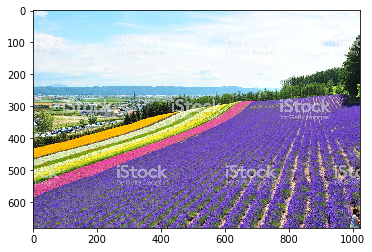

In [5]:
plt.imshow(imagen1Matriz)

IMAGEN2

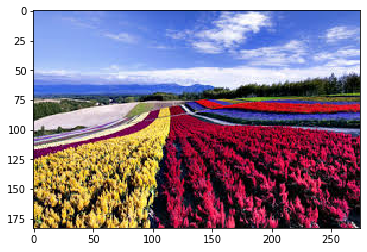

In [6]:
plt.imshow(imagen2Matriz)

## Imagenes tratadas con Adobe Photoshop

Necesitamos eliminar el ruido de las fotos para concentrarnos en las flores de las imagenes, para ello utilizamos el programa de Adobe Photoshop para quitar el ruido y remplzarlo por un color que no vamos a tener en cuenta a la hora del analisis

In [0]:
#Imagen 1 sin ruido
imagen1Matriz = cv2.imread('Cultivos_de_Flores_1_Procesada.jpg') #Convierte la imagen en una array de arrays que cada uno representa un pixel en codigo BGR
imagen1Matriz = cv2.cvtColor(imagen1Matriz,cv2.COLOR_BGR2RGB) #Convierte los codfigo BGR en codigos RGB

#Imagen 2 sin ruido
imagen2Matriz = cv2.imread('Cultivos_de_Flores_2_Procesada.jpg') #Convierte la imagen en una array de arrays que cada uno representa un pixel en codigo BGR
imagen2Matriz = cv2.cvtColor(imagen2Matriz,cv2.COLOR_BGR2RGB) #Convierte los codfigo BGR en codigos RGB


# Aplicando capas convolucionales a las imagenes
En esta parte se procesan las imagenes, el primer filtro aplicado es para eliminar el ruido innecesario de las imagenes y el segundo es para tratar de suavizar la imagen con el fin de eliminar la gama de colores que hay y dejar colores mas solidos para su posterior analisis.

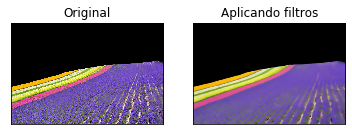

In [8]:
kernel = np.ones((5,5),np.float32)/25
#dst = cv2.filter2D(imagen1Matriz,-1,kernel)
#dst = cv2.blur(imagen1Matriz,(3,3))
#dst = cv2.medianBlur(imagen1Matriz,5)
dst = cv2.fastNlMeansDenoisingColored(imagen1Matriz,None,20,10,7,21)
dst = cv2.filter2D(dst,-1,kernel)
#plt.imshow(imagen1Matriz)
#plt.imshow(dst)

plt.subplot(121),plt.imshow(imagen1Matriz),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Aplicando filtros')
plt.xticks([]), plt.yticks([])
plt.show()

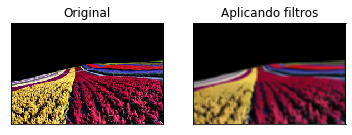

In [9]:
#dst2 = cv2.filter2D(imagen2Matriz,-1,kernel)
#dst2 = cv2.medianBlur(imagen2Matriz,5)
dst2 = cv2.fastNlMeansDenoisingColored(imagen2Matriz,None,20,10,7,21)
dst2 = cv2.filter2D(dst2,-1,kernel)
#dst2 = cv2.blur(imagen2Matriz,(3,3))
#plt.imshow(imagen2Matriz)
#plt.imshow(dst2)
plt.subplot(121),plt.imshow(imagen2Matriz),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst2),plt.title('Aplicando filtros')
plt.xticks([]), plt.yticks([])
plt.show()
#plt.imshow(imagen2Matriz)

In [0]:
imagen1Matriz = dst
imagen2Matriz = dst2

# **Eliminar registro negro en las imagenes**

En esta parte, luego de aplicar los filtros a las imagenes, vamos a proceder a eliminar los pixeles negros que no hacen parte de lo que queremos estudiar, y tambien algunos puntos grises que quedaron luego de quitar las marcas de agua con photoshop

In [11]:
imagen1 = imagen1Matriz.reshape((imagen1Matriz.shape[0]*imagen1Matriz.shape[1],3)) #Convierte en un array lineal que contiene arrays de 3 posiciones con los codigos RGB
imagen2 = imagen2Matriz.reshape((imagen2Matriz.shape[0]*imagen2Matriz.shape[1],3)) #Convierte en un array lineal que contiene arrays de 3 posiciones con los codigos RGB
elementos = imagen1.tolist()
ans = []
print((int(elementos[0][0])))
for i in range(len(elementos)):
  if not (elementos[i][0] <= 40 and elementos[i][1] <= 40 and elementos[i][2] <= 40):
    if not(86 < elementos[i][0] < 106 and 87 < elementos[i][1] < 107 and 77 < elementos[i][2] < 97):
      ans.append(elementos[i])
print(len(ans))
print(len(elementos))
imagen1=np.array(ans)
print(imagen1)
elementos2 = imagen2.tolist()
ans2 = []
for i in range(len(elementos2)):
  if not (elementos2[i][0] <= 40 and elementos2[i][1] <= 40 and elementos2[i][2] <= 40):
    ans2.append(elementos2[i])
imagen2=np.array(ans2)

0
363636
697344
[[ 32  30  42]
 [ 35  32  46]
 [ 36  33  48]
 ...
 [ 90  80 132]
 [ 90  80 131]
 [ 90  80 130]]


# Proceso de clusterisacion


##Creacion de la clase AnalizadorDeImagenFlores

Se crea la clase "AnalizadorDeImagenFlores" la cual contiene como atributos la cantidad de clusters a utilizar , la imagen transformada a un array de pixeles, los colores centrales o centroides del cluster , las etiquetas que este genera con el proceso , la asignacion de colores dominantes a cada pixel utilizando estas etiquetas y la cantidad de los mismos.

In [0]:
plt.rcParams['figure.figsize'] = (12, 5)            #Estilo para las graficas
plt.style.use('ggplot')

from sklearn.cluster import KMeans
class  AnalizadorDeImagenFlores:
  def __init__(self,imagenProcesada,clusters=3):
    self.clusters = clusters
    self.imagenTransformada = imagenProcesada       #Ingresamos el array lineal con los pixeles de la imagen
    kmeans = KMeans(n_clusters = self.clusters)
    kmeans.fit(self.imagenTransformada)
    self.coloresCentrales = kmeans.cluster_centers_ #Array con las especificaciones de los colores centroides
    self.labels = kmeans.labels_                    #Array con la asignacion de cada uno de los pixeles a cada centroide , va de 0 a la cantidad de clusters - 1 
    self.asignar = []
    self.cantidad = []                              #Diccionario con la cantidad de datos por cada label
    for c in range(0,clusters):
      self.cantidad.append(0)
    for label in self.labels:
      self.asignar.append(self.rgb_to_hex(self.coloresCentrales[label]))
      self.cantidad[label] = self.cantidad[label] + 1



  def getColoresDominantes(self):
    return self.coloresCentrales.astype(int)
  def rgb_to_hex(self,rgb):
    return '#%02x%02x%02x' % (int(rgb[0]),int(rgb[1]),int(rgb[2]))   # Convierte una referencia rgb a una hex
  def plotClusters(self):
    figura =plt.figure()
    ax = Axes3D(figura)
    X = self.imagenTransformada
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=self.asignar , s = 5)
    plt.show()

A continuacion vamos a ver en detalle que hace cada uno de los metodos de nuestra clase.

## Analisis con K Means de la imagen **1**

### Seleccion de K por medio de la grafica de codo

Miremos la cantidad de clusters por medio del analisis de la grafica de codo, esta grafica es un buen indice para mirar cual es el numero optimo de clusters, ademas por el tamaño del data set que es la cantidad de pixeles en una imagen esta es una alternativa más viable en cuanto complejidad computacional. 

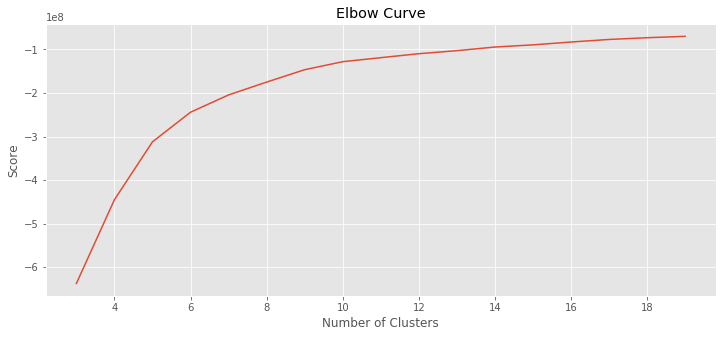

In [13]:
Nc = range(3, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(imagen1).score(imagen1) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Analisis de los atributos 

**Constructor __init__**
En este constructor utilizamos la imagen procesada y el numero de clusters para la imagen que se inicializan a la hora de crear el objeto para utilizar kmeans y obtener los colores centrales y los labels

Para la imagen 1 en concreto se decidio utilizar 6 clusters que corresponden a los colores distinguibles en la imagen junto con la validacion de la grafica de codo , miremos cuales son los colores dominantes o centroides

In [14]:
analizadorImagen1 = AnalizadorDeImagenFlores(imagen1,6)
analizadorImagen1.getColoresDominantes()

array([[104,  91, 130],
       [225, 199,  35],
       [110,  81, 175],
       [205,  95, 145],
       [211, 216, 146],
       [124, 133,  59]])

Como se puede observar , el algortmo nos encuentra 6 centroides representados por arrays de 3 elementos, que indica las coordenadas en el espacio y a su vez el valor en RBG del color dominante

Se utiliza la funcion **getColoresDominantes()** ya que en general los centroides son valores continuos , de esta manera los podemos representar en su forma entera y esto tiene mas sentido al corresponder a un valor RGB




Miremos como son los labels, simplemente es una asignacion a cada dato segun el cluster correspondiente

In [15]:
analizadorImagen1.labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Como se puede observar los labels es un array con el indice a un centroide (color dominante) al que corresponde cada pixel en orden. 
Va desde 0 a 5

### Graficando los datos

A continuacion vamos a graficar en 3D los datos que obtuvimos de K Means

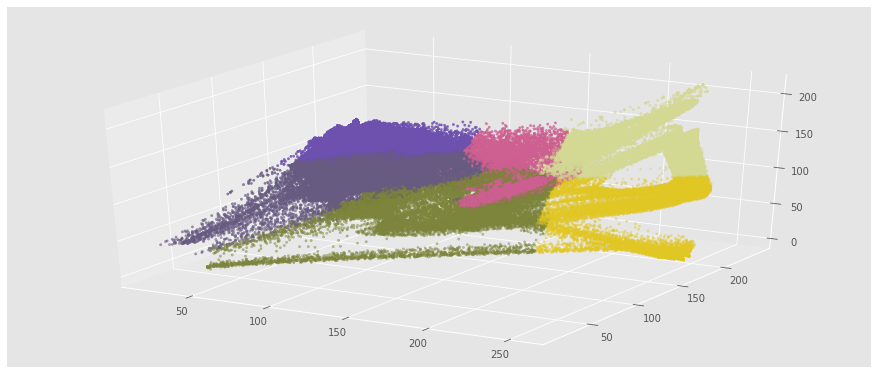

In [16]:
analizadorImagen1.plotClusters()

Como se puede observar en la grafica hay una distribucion de los colores distinguible por sus colores, seria pertienente saber cuantos de estos pixeles corresponden a estos colores observados




Grafiquemos la cantidad de datos por cluster

110 81 175


[]

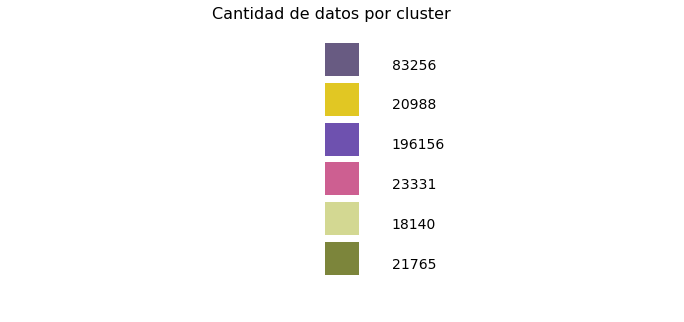

In [17]:
colores =  analizadorImagen1.getColoresDominantes()
figura =plt.figure()
figura.suptitle('Cantidad de datos por cluster', fontsize=16)
gs = figura.add_gridspec(analizadorImagen1.clusters + 1, 3)
print(colores[2][0],colores[2][1],colores[2][2])
for i in range(0,analizadorImagen1.clusters):
  ax = figura.add_subplot(gs[i, :])
  ax.text(2, 0.2, analizadorImagen1.cantidad[i], fontsize=14)
  ax.add_patch(plt.Circle((0, 0), 3, color=(colores[i][0]/255,colores[i][1]/255,colores[i][2]/255)))
  ax.set_aspect('equal', adjustable='box')
  ax.axis("off")
ax = figura.add_subplot(gs[i+1, :])
ax.axis("off")
plt.plot()


Suponiendo que cada color **corresponde a una planta distinta** , veamos cuanto porcentaje ocupa cada una. Esta suposicion la hacemos debido a que no conocemos un contexto del problema

[]

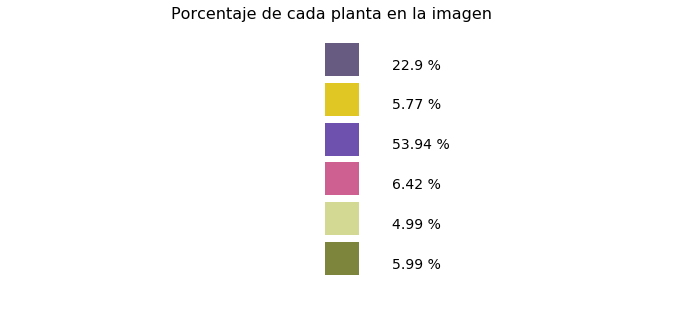

In [18]:
totalDatos =  sum(analizadorImagen1.cantidad)
figura =plt.figure()
figura.suptitle('Porcentaje de cada planta en la imagen', fontsize=16)
gs = figura.add_gridspec(analizadorImagen1.clusters + 1, 3)
for i in range(0,analizadorImagen1.clusters):
  ax = figura.add_subplot(gs[i, :])
  ax.text(2, 0.2, str(round(analizadorImagen1.cantidad[i]*100/totalDatos,2)) + " %", fontsize=14)
  ax.add_patch(plt.Circle((0, 0), 3, color=(colores[i][0]/255,colores[i][1]/255,colores[i][2]/255)))
  ax.set_aspect('equal', adjustable='box')
  ax.axis("off")
ax = figura.add_subplot(gs[i+1, :])
ax.axis("off")
plt.plot()


Podemos deducir que la gran mayoria de la plantacion corresponde a colores como el morado o purpura , se identificaron dos plantaciones distintas de tonalidades parecidas y que corresponden a la mayoria de la imagen. Se encuentran geometricamente en la misma area compartiendo parcela de plantacion por lo que se podria deducir que corresponde a la misma plantacion solo que posee distintas tonalidades de morado, sin embargo no tenemos ningun contexto del problema para afirmarlo con certeza.

## Analisis con K Means de la imagen **2**

### Seleccion de K por medio de la grafica de codo

Miremos la cantidad de clusters por medio del analisis de la grafica de codo, esta grafica es un buen indice para mirar cual es el numero optimo de clusters, ademas por el tamaño del data set que es la cantidad de pixeles en una imagen esta es una alternativa más viable en cuanto complejidad computacional. 

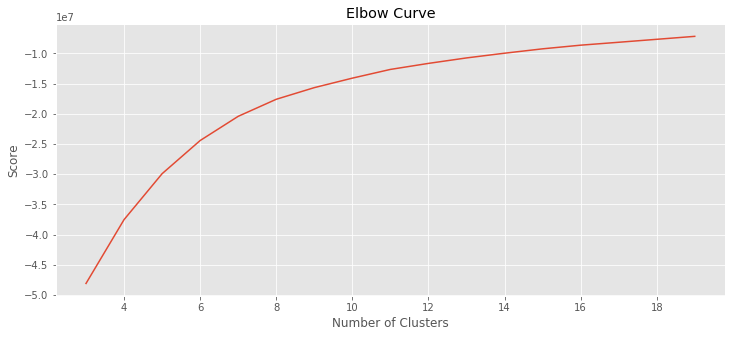

In [19]:
Nc = range(3, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(imagen2).score(imagen2) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Analisis de los atributos 

**Constructor __init__**
En este constructor utilizamos la imagen procesada y el numero de clusters para la imagen que se inicializan a la hora de crear el objeto para utilizar kmeans y obtener los colores centrales y los labels

Para la imagen 2 en concreto se decidio utilizar 7 clusters que corresponden a los colores distinguibles en la imagen junto con la validacion de la grafica de codo , miremos cuales son los colores dominantes o centroides

In [20]:
analizadorImagen2 = AnalizadorDeImagenFlores(imagen2,7)
analizadorImagen2.getColoresDominantes()

array([[121,  15,  47],
       [197, 163,  73],
       [ 69,  65, 108],
       [162, 143, 148],
       [162,  30,  65],
       [ 63,  27,  36],
       [138, 110,  53]])

Como se puede observar , el algortmo nos encuentra -n- centroides representados por arrays de 3 elementos, que indica las coordenadas en el espacio y a su vez el valor en RBG del color dominante

Se utiliza la funcion **getColoresDominantes()** ya que en general los centroides son valores continuos , de esta manera los podemos representar en su forma entera y esto tiene mas sentido al corresponder a un valor RGB


Miremos como son los labels, simplemente es una asignacion a cada dato segun el cluster correspondiente

In [21]:
analizadorImagen2.labels

array([5, 5, 5, ..., 2, 2, 5], dtype=int32)

Como se puede observar los labels es un array con el indice a un centroide (color dominante) al que corresponde cada pixel en orden. 
Va desde 0 a 6

### Graficando los datos

A continuacion vamos a graficar en 3D los datos que obtuvimos de K Means

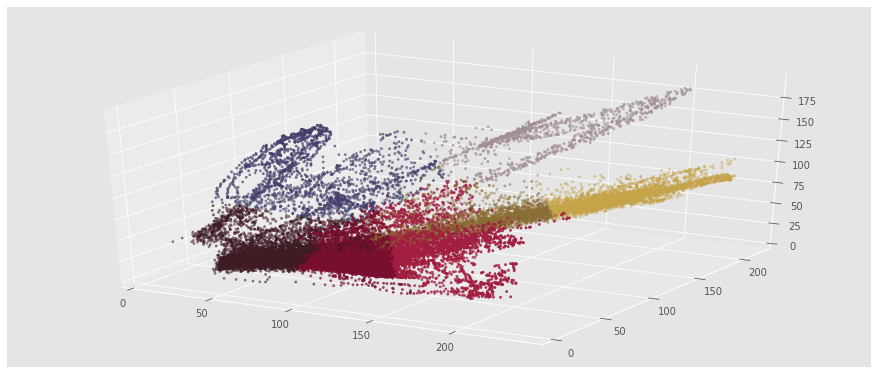

In [22]:
analizadorImagen2.plotClusters()

Como se puede observar en la grafica hay una distribucion de los colores distinguible por sus colores, seria pertienente saber cuantos de estos pixeles corresponden a estos colores observados



Grafiquemos la cantidad de datos por cluster

[]

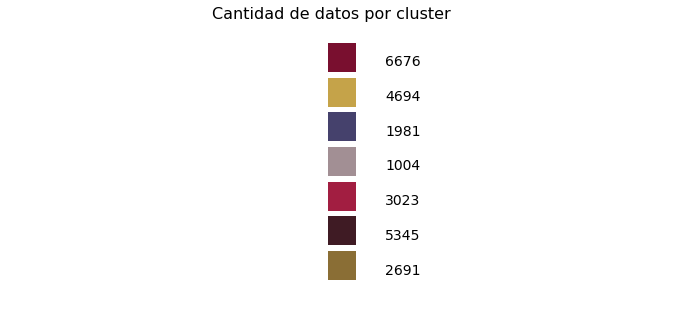

In [23]:
colores =  analizadorImagen2.getColoresDominantes()
figura =plt.figure()
figura.suptitle('Cantidad de datos por cluster', fontsize=16)
gs = figura.add_gridspec(analizadorImagen2.clusters + 1, 3)
for i in range(0,analizadorImagen2.clusters):
  ax = figura.add_subplot(gs[i, :])
  ax.text(2, 0.2, analizadorImagen2.cantidad[i], fontsize=14)
  ax.add_patch(plt.Circle((0, 0), 3, color=(colores[i][0]/255,colores[i][1]/255,colores[i][2]/255)))
  ax.set_aspect('equal', adjustable='box')
  ax.axis("off")
ax = figura.add_subplot(gs[i+1, :])
ax.axis("off")
plt.plot()

Suponiendo que cada color **corresponde a una planta distinta** , veamos cuanto porcentaje ocupa cada una. Esta suposicion la hacemos debido a que no conocemos un contexto del problema

[]

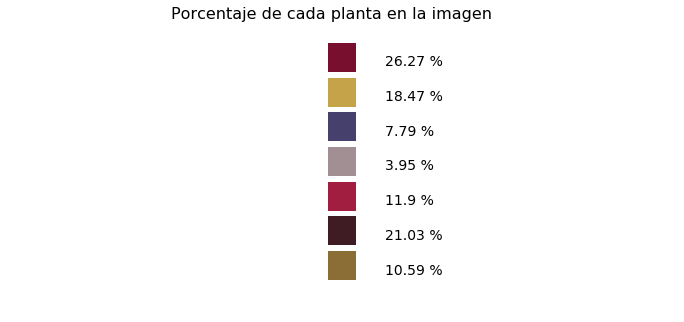

In [24]:
totalDatos =  sum(analizadorImagen2.cantidad)
figura =plt.figure()
figura.suptitle('Porcentaje de cada planta en la imagen', fontsize=16)
gs = figura.add_gridspec(analizadorImagen2.clusters + 1, 3)
for i in range(0,analizadorImagen2.clusters):
  ax = figura.add_subplot(gs[i, :])
  ax.text(2, 0.2, str(round(analizadorImagen2.cantidad[i]*100/totalDatos,2)) + " %", fontsize=14)
  ax.add_patch(plt.Circle((0, 0), 3, color=(colores[i][0]/255,colores[i][1]/255,colores[i][2]/255)))
  ax.set_aspect('equal', adjustable='box')
  ax.axis("off")
ax = figura.add_subplot(gs[i+1, :])
ax.axis("off")
plt.plot()

Al igual que la primera imagen hay una tonalidad dominante en esta imagen, en este caso seria la tonalidad rojiza - vinotinto , en las tonalidades amarillas - cafe se produce una division en dos categorias la cual es una más opaca que otra , esto se deduce debido a el angulo en el que se tomo la foto generando un color más opaco en el plano mas cercano debido a la iluminación , podriamos asumir que se trata de la misma plantacion pero de nuevo no poseemos un contexto.

# Tendencias

Aqui se habla sobre las 5 tendencias detectadas